# The Weather Dataset
***
Here, 
The Weather Dataset is a time-series data set with per-hour information about the weather conditions at a particular location. It records Temperature, Dew Point Temperature, Relative Humidity, Wind Speed, Visibility, Pressure, and Conditions.


This data is available as a CSV file. We are going to analyze this data set using the Pandas DataFrame.

In [97]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [56]:
data = pd.read_csv("C:\\Users\PAWAN\\Downloads\\Project+1+-+Weather+Dataset.csv")

In [57]:
data

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
0,1/1/2012 0:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,1/1/2012 1:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2,1/1/2012 2:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
3,1/1/2012 3:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
4,1/1/2012 4:00,-1.5,-3.3,88,7,4.8,101.23,Fog
...,...,...,...,...,...,...,...,...
8779,12/31/2012 19:00,0.1,-2.7,81,30,9.7,100.13,Snow
8780,12/31/2012 20:00,0.2,-2.4,83,24,9.7,100.03,Snow
8781,12/31/2012 21:00,-0.5,-1.5,93,28,4.8,99.95,Snow
8782,12/31/2012 22:00,-0.2,-1.8,89,28,9.7,99.91,Snow


In [58]:
data["Weather"].unique()

array(['Fog', 'Freezing Drizzle,Fog', 'Mostly Cloudy', 'Cloudy', 'Rain',
       'Rain Showers', 'Mainly Clear', 'Snow Showers', 'Snow', 'Clear',
       'Freezing Rain,Fog', 'Freezing Rain', 'Freezing Drizzle',
       'Rain,Snow', 'Moderate Snow', 'Freezing Drizzle,Snow',
       'Freezing Rain,Snow Grains', 'Snow,Blowing Snow', 'Freezing Fog',
       'Haze', 'Rain,Fog', 'Drizzle,Fog', 'Drizzle',
       'Freezing Drizzle,Haze', 'Freezing Rain,Haze', 'Snow,Haze',
       'Snow,Fog', 'Snow,Ice Pellets', 'Rain,Haze', 'Thunderstorms,Rain',
       'Thunderstorms,Rain Showers', 'Thunderstorms,Heavy Rain Showers',
       'Thunderstorms,Rain Showers,Fog', 'Thunderstorms',
       'Thunderstorms,Rain,Fog',
       'Thunderstorms,Moderate Rain Showers,Fog', 'Rain Showers,Fog',
       'Rain Showers,Snow Showers', 'Snow Pellets', 'Rain,Snow,Fog',
       'Moderate Rain,Fog', 'Freezing Rain,Ice Pellets,Fog',
       'Drizzle,Ice Pellets,Fog', 'Drizzle,Snow', 'Rain,Ice Pellets',
       'Drizzle,Snow,Fog', 

In [59]:
data.columns

Index(['Date/Time', 'Temp_C', 'Dew Point Temp_C', 'Rel Hum_%',
       'Wind Speed_km/h', 'Visibility_km', 'Press_kPa', 'Weather'],
      dtype='object')

In [60]:
# Step 1: Data Cleaning

# Convert Date/Time into datetime format, set as index.

# Rename columns for readability (Temp_C → Temperature, etc.).

# Handle missing/null values.

# Step 1: Data Cleaning

Convert Date/Time into datetime format, set as index.

In [61]:
data["Date/Time"]=pd.to_datetime(data["Date/Time"])

In [62]:
data.set_index(data["Date/Time"],inplace=True)


In [63]:
data.pop("Date/Time")

Date/Time
2012-01-01 00:00:00   2012-01-01 00:00:00
2012-01-01 01:00:00   2012-01-01 01:00:00
2012-01-01 02:00:00   2012-01-01 02:00:00
2012-01-01 03:00:00   2012-01-01 03:00:00
2012-01-01 04:00:00   2012-01-01 04:00:00
                              ...        
2012-12-31 19:00:00   2012-12-31 19:00:00
2012-12-31 20:00:00   2012-12-31 20:00:00
2012-12-31 21:00:00   2012-12-31 21:00:00
2012-12-31 22:00:00   2012-12-31 22:00:00
2012-12-31 23:00:00   2012-12-31 23:00:00
Name: Date/Time, Length: 8784, dtype: datetime64[ns]

In [64]:
data.head()

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
Date/Time,,,,,,,
2012-01-01 00:00:00,-1.8,-3.9,86,4,8.0,101.24,Fog
2012-01-01 01:00:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2012-01-01 02:00:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
2012-01-01 03:00:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
2012-01-01 04:00:00,-1.5,-3.3,88,7,4.8,101.23,Fog


Rename columns

In [65]:
data.rename(columns={
    'Temp_C': 'Temperature_C',
    'Rel Hum_%': 'Humidity_%',
}, inplace=True)

Handle missing/null values.

In [66]:
data.isnull().sum()

Temperature_C       0
Dew Point Temp_C    0
Humidity_%          0
Wind Speed_km/h     0
Visibility_km       0
Press_kPa           0
Weather             0
dtype: int64

In [67]:
# Step 2: Descriptive Statistics

# Average, min, max of each numerical column.

# Most common weather condition.

# Day/night temperature differences.

# Step 2: Descriptive Statistics

Average, min, max of each numerical column.

In [88]:
data.describe()

,Temperature_C,Dew Point Temp_C,Humidity_%,Wind Speed_km/h,Visibility_km,Press_kPa,Hour
count,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000
mean,8.798144,2.555294,67.431694,14.945469,27.664447,101.051623,11.500000
std,11.687883,10.883072,16.918881,8.688696,12.622688,0.844005,6.922581
min,-23.300000,-28.500000,18.000000,0.000000,0.200000,97.520000,0.000000
25%,0.100000,-5.900000,56.000000,9.000000,24.100000,100.560000,5.750000
50%,9.300000,3.300000,68.000000,13.000000,25.000000,101.070000,11.500000
75%,18.800000,11.800000,81.000000,20.000000,25.000000,101.590000,17.250000
max,33.000000,24.400000,100.000000,83.000000,48.300000,103.650000,23.000000


Most common weather condition.

In [89]:
data["Weather"].mode()

0    Mainly Clear
Name: Weather, dtype: object

Day/night temperature differences.

In [90]:
data["Hour"]=data.index.hour

data["Time_of_day"] = data["Hour"].apply(lambda x : "Day" if 6<= x <18 else "Night" )

data.groupby("Time_of_day")["Time_of_day"].count()

Time_of_day
Day      4392
Night    4392
Name: Time_of_day, dtype: int64

In [91]:
day_mean= (data["Temperature_C"][data["Time_of_day"]=="Day"]).mean()
night_mean=(data["Temperature_C"][data["Time_of_day"]=="Night"]).mean()

temp_diff = day_mean-night_mean
temp_diff

np.float64(1.8450591985428053)

In [92]:
day_night_stats = data.groupby("Time_of_day")["Temperature_C"].agg(["mean"])
print(day_night_stats)

                 mean
Time_of_day          
Day          9.720674
Night        7.875615


In [93]:
temp_diff = day_night_stats["Day"] - day_night_stats["Night"]
temp_diff

KeyError: 'Day'

# Step 3: Exploratory Data Analysis (EDA)

Temperature distribution histogram.

Line plot of temperature vs. time (seasonal trend).



Wind speed distribution.

Correlation heatmap across all numeric columns.

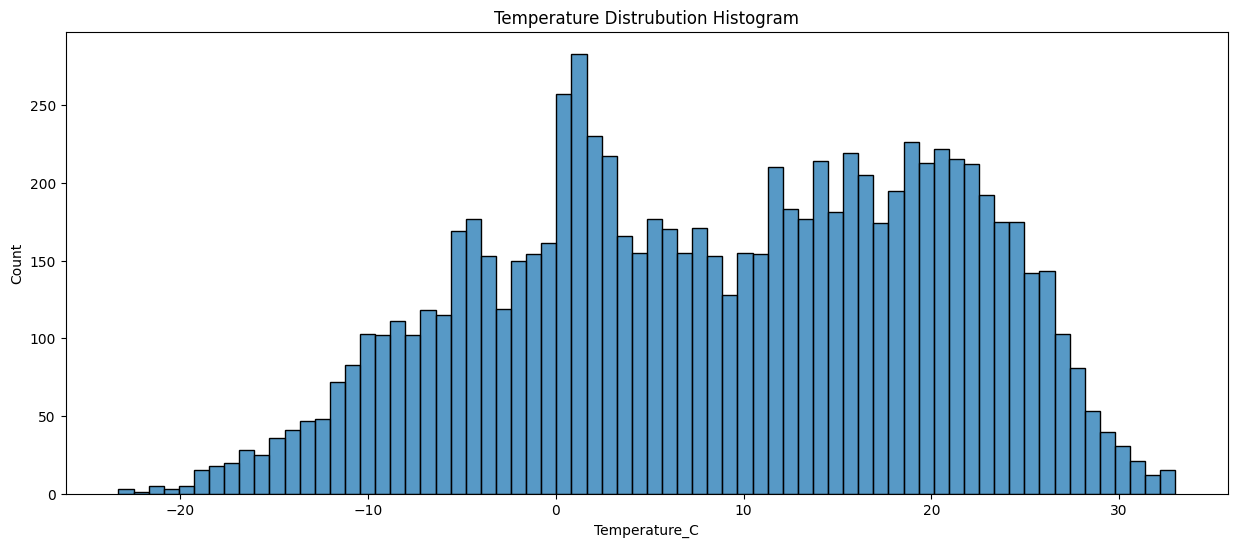

In [118]:
plt.figure(figsize=(15,6))
sns.histplot(data=data,x="Temperature_C",bins=70)
plt.title("Temperature Distrubution Histogram")
plt.show()

In [105]:
data.columns

Index(['Temperature_C', 'Dew Point Temp_C', 'Humidity_%', 'Wind Speed_km/h',
       'Visibility_km', 'Press_kPa', 'Weather', 'Hour', 'Time_of_day'],
      dtype='object')

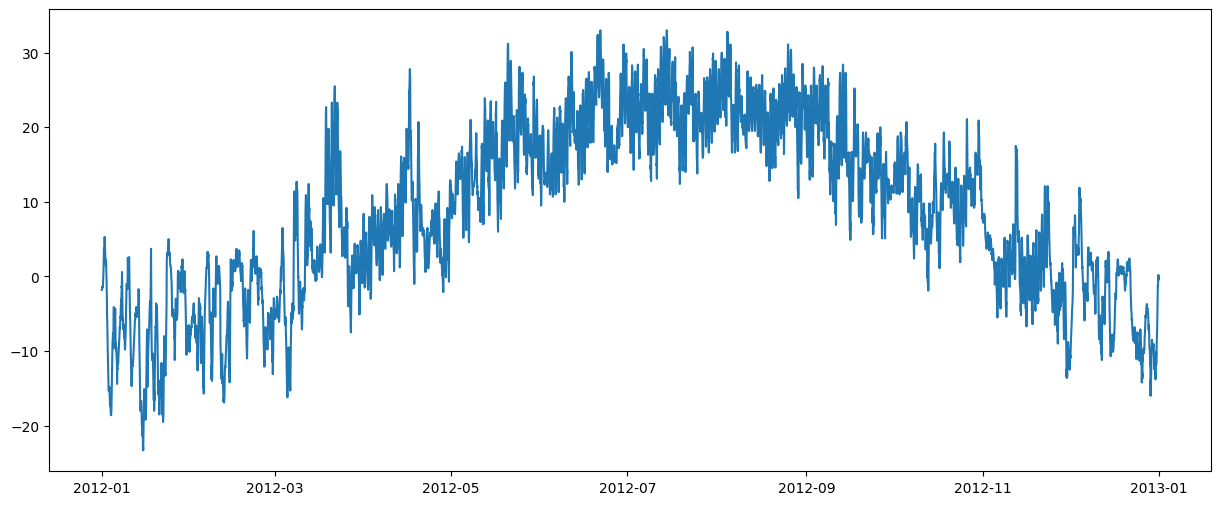

In [117]:
plt.figure(figsize=(15,6))
plt.plot(data.index, data["Temperature_C"])

Visibility vs. weather condition (boxplot).

<Axes: ylabel='Visibility_km'>

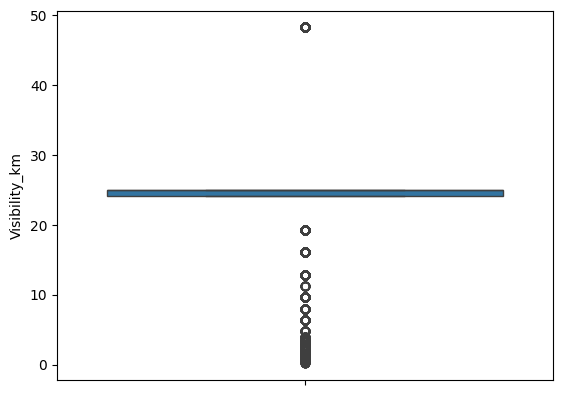

In [125]:
sns.boxplot(data["Visibility_km"])